In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [6]:
CLIENT_ID = 'DELXEDBL1TTYTPC4OH4LWIPSJBYSPRWK5ODJ3H5GMDGJ2PCZ' # your Foursquare ID
CLIENT_SECRET = '324DIGSOFO55EX1O24H5QEK3JESSHBZ45Y4NL4IT0QSKL5VM' # your Foursquare Secret
ACCESS_TOKEN = 'JUIYFP12DSEKFX3KKEUQTIDBSPUDOYJZMSBRQ3VZHT4XTYES' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 1000
radius = 3000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DELXEDBL1TTYTPC4OH4LWIPSJBYSPRWK5ODJ3H5GMDGJ2PCZ
CLIENT_SECRET:324DIGSOFO55EX1O24H5QEK3JESSHBZ45Y4NL4IT0QSKL5VM


In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


# Getting info about São Paulo

In [130]:
address = 'São Paulo, Brazil'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-23.5506507 -46.6333824


In [132]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=DELXEDBL1TTYTPC4OH4LWIPSJBYSPRWK5ODJ3H5GMDGJ2PCZ&client_secret=324DIGSOFO55EX1O24H5QEK3JESSHBZ45Y4NL4IT0QSKL5VM&ll=-23.5506507,-46.6333824&v=20180604&radius=3000&limit=1000'

In [133]:
results = requests.get(url).json()
'There are {} around location.'.format(len(results['response']['groups'][0]['items']))

'There are 100 around location.'

In [134]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '573dab3f498e4e0d56c67f4e',
  'name': 'Casa de Francisca',
  'location': {'address': 'R. Quintino Bocaiúva, 22',
   'crossStreet': 'R. Direita',
   'lat': -23.54873339376874,
   'lng': -46.63476347923278,
   'labeledLatLngs': [{'label': 'display',
     'lat': -23.54873339376874,
     'lng': -46.63476347923278}],
   'distance': 255,
   'postalCode': '01004-010',
   'cc': 'BR',
   'city': 'São Paulo',
   'state': 'SP',
   'country': 'Brasil',
   'formattedAddress': ['R. Quintino Bocaiúva, 22 (R. Direita)',
    'São Paulo, SP',
    '01004-010',
    'Brasil']},
  'categories': [{'id': '4bf58dd8d48988d1e5931735',
    'name': 'Music Venue',
    'pluralName': 'Music Venues',
    'shortName': 'Music Venue',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_',
     'suffix': '.png'},
    'prima

In [135]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/Users/FelipeAffonso/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Casa de Francisca,Music Venue,"R. Quintino Bocaiúva, 22",R. Direita,-23.548733,-46.634763,"[{'label': 'display', 'lat': -23.5487333937687...",255,01004-010,BR,São Paulo,SP,Brasil,"[R. Quintino Bocaiúva, 22 (R. Direita), São Pa...",NaN,573dab3f498e4e0d56c67f4e
1,Centro Cultural Banco do Brasil (CCBB),Cultural Center,"R. Álvares Penteado, 112",R. Quitanda,-23.547588,-46.634683,"[{'label': 'display', 'lat': -23.5475881903963...",365,01012-000,BR,São Paulo,SP,Brasil,"[R. Álvares Penteado, 112 (R. Quitanda), São P...",NaN,4b17eb00f964a520a1c923e3
2,Caixa Cultural,Art Gallery,"Praça da Sé, 111",NaN,-23.549381,-46.632849,"[{'label': 'display', 'lat': -23.5493810998600...",151,01001-000,BR,São Paulo,SP,Brasil,"[Praça da Sé, 111, São Paulo, SP, 01001-000, B...",NaN,4b642bb8f964a52057a22ae3
3,Teatro CCBB,Theater,Centro Cultural Banco do Brasil (CCBB),NaN,-23.547644,-46.634733,"[{'label': 'display', 'lat': -23.5476443703413...",361,01012-000,BR,São Paulo,SP,Brasil,"[Centro Cultural Banco do Brasil (CCBB), São P...",NaN,4f29bb59e4b09b0140fba336
4,Izakayada,Sake Bar,"Pç. Carlos Gomes, 61A",NaN,-23.553157,-46.635639,"[{'label': 'display', 'lat': -23.5531567959263...",361,01501-040,BR,São Paulo,SP,Brasil,"[Pç. Carlos Gomes, 61A, São Paulo, SP, 01501-0...",Sé,5477b866498edd0ef825a142
5,Princesa Supermercado de Cosméticos,Cosmetics Shop,"Rua São Bento, 51",NaN,-23.548520,-46.636514,"[{'label': 'display', 'lat': -23.5485199540431...",397,01011-000,BR,São Paulo,SP,Brasil,"[Rua São Bento, 51, São Paulo, SP, 01011-000, ...",NaN,4d99fdae2bd6f04d92058b50
6,Sukiya,Japanese Restaurant,"Pç. da Liberdade, 63",Av. da Liberdade,-23.554502,-46.635442,"[{'label': 'display', 'lat': -23.5545017665252...",477,01503-010,BR,São Paulo,SP,Brasil,"[Pç. da Liberdade, 63 (Av. da Liberdade), São ...",NaN,5735b52f498edf72138925cf
7,Praça da Liberdade,Plaza,Pç. da Liberdade,NaN,-23.555262,-46.635325,NaN,550,01503-010,BR,São Paulo,SP,Brasil,"[Pç. da Liberdade, São Paulo, SP, 01503-010, B...",NaN,4b3c92e8f964a520428525e3
8,Tanka Asian Kitchen,Asian Restaurant,"Pç. da Liberdade, 149, 1º Andar",NaN,-23.555325,-46.635397,"[{'label': 'display', 'lat': -23.5553246035754...",559,01503-010,BR,São Paulo,SP,Brasil,"[Pç. da Liberdade, 149, 1º Andar, São Paulo, S...",NaN,51d5a70c498ea9118bc0f102
9,Casa Godinho,Grocery Store,"R. Líbero Badaró, 340",NaN,-23.546639,-46.636469,"[{'label': 'display', 'lat': -23.5466394538108...",546,01008-000,BR,São Paulo,SP,Brasil,"[R. Líbero Badaró, 340, São Paulo, SP, 01008-0...",NaN,4b913a40f964a5208eab33e3


In [120]:
dataframe_filtered.name

0                      Caixa Cultural
1                   Casa de Francisca
2                    Livraria Saraiva
3                  João Justino Jóias
4                          Kopenhagen
                   ...               
59    Bolos Caseiros Delícias da Vovó
60                    Multi Essências
61                        Trasmontano
62                       Carmo Drinks
63                          Art Carmo
Name: name, Length: 64, dtype: object

In [136]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Start',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

In [137]:
venues_map

In [149]:
cat = dataframe_filtered['categories'].value_counts()

In [151]:
cat

Theater                5
Cultural Center        4
Pet Store              3
Grocery Store          3
Coffee Shop            3
                      ..
Cocktail Bar           1
Comedy Club            1
Gymnastics Gym         1
Empanada Restaurant    1
Music Venue            1
Name: categories, Length: 65, dtype: int64

In [30]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

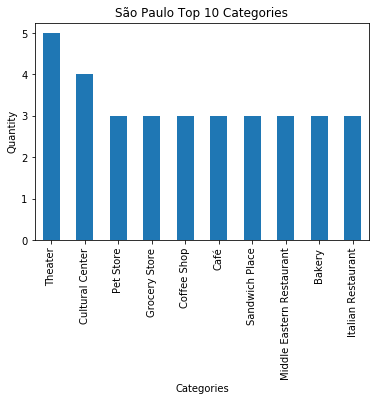

In [157]:
cat.head(10).plot(kind='bar')
plt.title("São Paulo Top 10 Categories")
plt.xlabel("Categories")
plt.ylabel("Quantity")
plt.show()

# Porto Alegre Information

In [165]:
address = 'Porto Alegre, Brazil'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [166]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

In [167]:
results = requests.get(url).json()

In [168]:
items = results['response']['groups'][0]['items']

In [169]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/Users/FelipeAffonso/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Theatro São Pedro,Theater,"Pça. Mal. Deodoro, s/n",R. Gen. Câmara,-30.031734,-51.230260,"[{'label': 'display', 'lat': -30.0317344272062...",85,90010-300,BR,Porto Alegre,RS,Brasil,"[Pça. Mal. Deodoro, s/n (R. Gen. Câmara), Port...",NaN,4b64b6dbf964a52081ca2ae3
1,Du'Attos Multipalco Restaurante,Brazilian Restaurant,Pça. Multipalco,NaN,-30.031840,-51.230745,"[{'label': 'display', 'lat': -30.0318402662198...",81,90010-300,BR,Porto Alegre,RS,Brasil,"[Pça. Multipalco, Porto Alegre, RS, 90010-300,...",NaN,4b9116b4f964a52035a333e3
2,iL POMODORiNO,Pizza Place,"R. Cel. Fernando Machado, 583",R. Gen. Auto,-30.035145,-51.231833,"[{'label': 'display', 'lat': -30.0351452526007...",326,90010-320,BR,Porto Alegre,RS,Brasil,"[R. Cel. Fernando Machado, 583 (R. Gen. Auto),...",Centro Histórico,576ab2e6498eab09a16bfe89
3,Armazém Porto Alegre,Pub,"Av. Borges de Medeiros, 786",R. Dq. de Caxias,-30.033491,-51.227952,"[{'label': 'display', 'lat': -30.0334911977916...",258,90020-024,BR,Porto Alegre,RS,Brasil,"[Av. Borges de Medeiros, 786 (R. Dq. de Caxias...",NaN,50904f1be4b08502801d2f8e
4,Santander Cultural,Art Museum,"R. Sete de Setembro, 1028",R. Gen. Câmara,-30.028970,-51.230406,"[{'label': 'display', 'lat': -30.0289702178846...",392,90010-191,BR,Porto Alegre,RS,Brasil,"[R. Sete de Setembro, 1028 (R. Gen. Câmara), P...",Centro Histórico,4ba678ecf964a520005639e3
5,Donna Laura Doces e Salgados,Dessert Shop,"R. Cel. Fernando Machado, 1164",NaN,-30.034907,-51.226823,"[{'label': 'display', 'lat': -30.0349071996595...",434,90010-320,BR,Porto Alegre,RS,Brasil,"[R. Cel. Fernando Machado, 1164, Porto Alegre,...",NaN,550aeeed498ee9448f602bcd
6,Jardim Lutzenberger,Garden,Casa de Cultura Mario Quintana,5º Andar,-30.031242,-51.234436,"[{'label': 'display', 'lat': -30.0312415829564...",415,90020-004,BR,Porto Alegre,RS,Brasil,"[Casa de Cultura Mario Quintana (5º Andar), Po...",NaN,4e3ad128483b3f951fcb03a7
7,Casa de Cultura Mario Quintana,Cultural Center,"R. dos Andradas, 736",Tv. dos Cataventos,-30.031203,-51.234440,"[{'label': 'display', 'lat': -30.0312028984433...",417,90020-004,BR,Porto Alegre,RS,Brasil,"[R. dos Andradas, 736 (Tv. dos Cataventos), Po...",Centro,4b86ff03f964a52061aa31e3
8,Atelier de Massas,Italian Restaurant,"R. Riachuelo, 1482",NaN,-30.031553,-51.226585,"[{'label': 'display', 'lat': -30.0315529735288...",380,90010-273,BR,Porto Alegre,RS,Brasil,"[R. Riachuelo, 1482, Porto Alegre, RS, 90010-2...",NaN,4b75a4fbf964a52098192ee3
9,Cinemateca Capitólio Petrobras,Movie Theater,"R. Demétrio Ribeiro, 1085",Av. Borges de Madeiros,-30.036145,-51.228224,"[{'label': 'display', 'lat': -30.0361449688065...",455,90010-311,BR,Porto Alegre,RS,Brasil,"[R. Demétrio Ribeiro, 1085 (Av. Borges de Made...",NaN,4bf57657706e20a12581aa98


In [170]:
poa_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Start',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(poa_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(poa_map)
    
poa_map

In [171]:
cat = dataframe_filtered['categories'].value_counts()

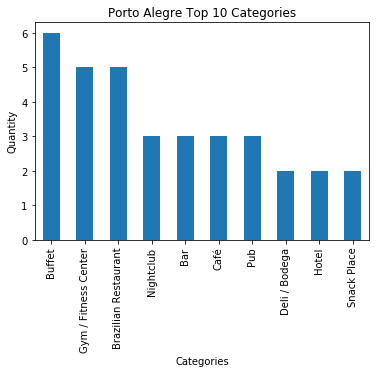

In [172]:
cat.head(10).plot(kind='bar')
plt.title("Porto Alegre Top 10 Categories")
plt.xlabel("Categories")
plt.ylabel("Quantity")
plt.show()

# Rio de Janeiro Information

In [180]:
address = 'Copacabana, Rio de Janeiro, Brazil'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [184]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

results = requests.get(url).json()

items = results['response']['groups'][0]['items']

In [185]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/Users/FelipeAffonso/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,neighborhood,crossStreet,id
0,Praia de Copacabana,Beach,Av. Atlântica,-22.972441,-43.183436,"[{'label': 'display', 'lat': -22.9724405082997...",107,BR,Rio de Janeiro,RJ,Brasil,"[Av. Atlântica, Rio de Janeiro, RJ, Brasil]",NaN,NaN,NaN,4b2ff8faf964a520a8f324e3
1,Windsor California Hotel,Hotel,"Av. Atlântica, 2616",-22.972704,-43.185707,"[{'label': 'display', 'lat': -22.9727041791154...",162,BR,Rio de Janeiro,RJ,Brasil,"[Av. Atlântica, 2616, Rio de Janeiro, RJ, 2204...",22041-001,Copacabana,NaN,5b19a6f87269fe002c9721e0
2,Barraca da Chiquita,Northeastern Brazilian Restaurant,Santa Clara 33,-22.972091,-43.186736,"[{'label': 'display', 'lat': -22.9720913167569...",245,BR,Rio de Janeiro,RJ,Brasil,"[Santa Clara 33, Rio de Janeiro, RJ, 22031-011...",22031-011,Copacabana,NaN,59594b9d73fe251e47bb4bef
3,Hotel Sesc Copacabana,Hotel,Sesc Copacabana,-22.973265,-43.187299,"[{'label': 'display', 'lat': -22.9732645220568...",335,BR,Rio de Janeiro,RJ,Brasil,"[Sesc Copacabana, Rio de Janeiro, RJ, 22050-01...",22050-012,NaN,NaN,4e336fee62e1733d7aa2724b
4,Santa Satisfação,Bistro,"R. Sta. Clara, 36C",-22.972035,-43.186719,"[{'label': 'display', 'lat': -22.9720348378368...",243,BR,Rio de Janeiro,RJ,Brasil,"[R. Sta. Clara, 36C (R. Domingos Ferreira), Ri...",22041-012,Copacabana,R. Domingos Ferreira,4b23f3ccf964a520aa5d24e3
5,Orla de Copacabana,Waterfront,Av. Atlântica,-22.975242,-43.187913,"[{'label': 'display', 'lat': -22.9752421023851...",516,BR,Rio de Janeiro,RJ,Brasil,"[Av. Atlântica, Rio de Janeiro, RJ, Brasil]",NaN,NaN,NaN,51f4f4bd498e2abc1ce873ac
6,Arena Copacabana Hotel,Hotel,"Av. Atlântica, 2064",-22.969172,-43.181997,"[{'label': 'display', 'lat': -22.9691715769232...",392,BR,Rio de Janeiro,RJ,Brasil,"[Av. Atlântica, 2064 (R. Paula Freitas), Rio d...",22021-001,NaN,R. Paula Freitas,4c2948b43492a59303c4b828
7,Kopenhagen,Chocolate Shop,"R. Figueiredo Magalhães, 131B",-22.970680,-43.185617,"[{'label': 'display', 'lat': -22.9706796345576...",193,BR,Rio de Janeiro,RJ,Brasil,"[R. Figueiredo Magalhães, 131B, Rio de Janeiro...",22031-010,NaN,NaN,4c3c6735a9509c74221e395b
8,Bar & Champanheria Copacabana,Beach Bar,"Av. Atlântica, Posto 4 - Quiosque 28",-22.974220,-43.186296,"[{'label': 'display', 'lat': -22.9742203535257...",321,BR,Rio de Janeiro,RJ,Brasil,"[Av. Atlântica, Posto 4 - Quiosque 28, Rio de ...",NaN,NaN,NaN,4b254f50f964a520bc6f24e3
9,Bendito,Dessert Shop,"R. Hilário de Gouveia, 88, Lj. A",-22.968018,-43.184197,"[{'label': 'display', 'lat': -22.9680181300780...",439,BR,Rio de Janeiro,RJ,Brasil,"[R. Hilário de Gouveia, 88, Lj. A, Rio de Jane...",22040-020,NaN,NaN,53d91912498eb321245e654b


In [186]:
rj_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Start',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(rj_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(rj_map)
    
rj_map

In [187]:
cat = dataframe_filtered['categories'].value_counts()

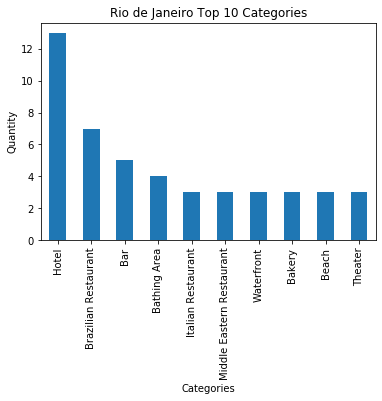

In [188]:
cat.head(10).plot(kind='bar')
plt.title("Rio de Janeiro Top 10 Categories")
plt.xlabel("Categories")
plt.ylabel("Quantity")
plt.show()

# Information about Belo Horizonte

In [23]:
address = 'Vitória, Brazil'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [24]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

results = requests.get(url).json()

items = results['response']['groups'][0]['items']

In [25]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/Users/FelipeAffonso/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,neighborhood,postalCode,crossStreet,id
0,Catedral Metropolitana de Vitória,Church,R. José Marcelino,-20.319979,-40.337418,"[{'label': 'display', 'lat': -20.3199794375668...",28,BR,Vitória,ES,Brasil,"[R. José Marcelino, Vitória, ES, Brasil]",NaN,NaN,NaN,4c85141f74d7b60c0c1198d8
1,Theatro Carlos Gomes,Theater,"Pça. Costa Pereira, s/n",-20.319809,-40.335219,"[{'label': 'display', 'lat': -20.3198087227594...",257,BR,Vitória,ES,Brasil,"[Pça. Costa Pereira, s/n, Vitória, ES, Brasil]",Centro,NaN,NaN,4bf275f620960f478d406e2f
2,Palácio Anchieta,Government Building,Pç. João Clímaco,-20.321004,-40.339114,"[{'label': 'display', 'lat': -20.3210041680563...",181,BR,Vitória,ES,Brasil,"[Pç. João Clímaco, Vitória, ES, Brasil]",NaN,NaN,NaN,4bc0fc7a74a9a593dd1bd1f6
3,Casa de Bamba,Gastropub,"R. Gama Rosa, 154",-20.318974,-40.337805,"[{'label': 'display', 'lat': -20.3189738446036...",125,BR,Vitória,ES,Brasil,"[R. Gama Rosa, 154, Vitória, ES, 29015-100, Br...",Centro,29015-100,NaN,51b86bc4abd8cbfd6fad0d08
4,Verde Perene,Vegetarian / Vegan Restaurant,"Escadaria Maria Ortiz, 29",-20.320773,-40.338033,"[{'label': 'display', 'lat': -20.3207726018435...",84,BR,Vitória,ES,Brasil,"[Escadaria Maria Ortiz, 29, Vitória, ES, Brasil]",NaN,NaN,NaN,533acc5811d2ba4a588b56d5
5,Teatro Sesc Glória,Theater,Centro Cultural Sesc Glória,-20.320424,-40.335342,"[{'label': 'display', 'lat': -20.3204241620921...",245,BR,Vitória,ES,Brasil,"[Centro Cultural Sesc Glória, Vitória, ES, 290...",Centro,29010-002,NaN,54274bb5498ef72d7750d6d5
6,Restaurante Exporão,Brazilian Restaurant,NaN,-20.321151,-40.338089,"[{'label': 'display', 'lat': -20.3211508713403...",125,BR,Vitória,ES,Brasil,"[Vitória, ES, Brasil]",NaN,NaN,NaN,51700ebce4b002aad76d647b
7,Igreja de São Gonçalo,Church,"R. Cosme Rolin, S/N",-20.320246,-40.339427,"[{'label': 'display', 'lat': -20.3202462320072...",184,BR,Vitória,ES,Brasil,"[R. Cosme Rolin, S/N, Vitória, ES, 29015-050, ...",NaN,29015-050,NaN,4c423f36520fa59334f5caac
8,Museu Vale,Museum,"Av. Anésio José Simões, s/n",-20.326547,-40.344887,"[{'label': 'display', 'lat': -20.3265472477022...",1041,BR,Vila Velha,ES,Brasil,"[Av. Anésio José Simões, s/n (Argolas), Vila V...",NaN,29114-920,Argolas,4d814350360b224b29f2e956
9,Parque Estadual da Fonte Grande,Park,Estr. Tião Sá,-20.308881,-40.338933,"[{'label': 'display', 'lat': -20.3088812734550...",1254,BR,Vitória,ES,Brasil,"[Estr. Tião Sá, Vitória, ES, Brasil]",NaN,NaN,NaN,4c17ae7771b09c74a260e244


In [26]:
bh_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=50,
    popup='Start',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(bh_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(bh_map)


<bound method Element.save of <folium.folium.Map object at 0x7ff80e176710>>

In [27]:
bh_map

In [31]:
cat = dataframe_filtered['categories'].value_counts()

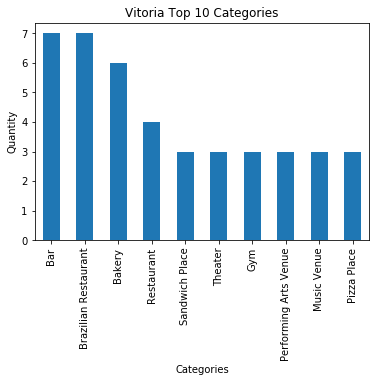

In [32]:
cat.head(10).plot(kind='bar')
plt.title("Vitoria Top 10 Categories")
plt.xlabel("Categories")
plt.ylabel("Quantity")
plt.show()